## Try to understand bathymetry grid cells of Fraser River inside NEMO

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools

In [2]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea.nc', 'r')
nc_tools.show_variables(bathy)
bathyy = bathy.variables['Bathymetry'][:]

[u'nav_lon', u'nav_lat', u'Bathymetry']


   # Create bathy_meter_SalishSea3.nc as fixed and extended file

In [3]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea.nc \
bathy_meter_SalishSea3.nc
bathy_3 = nc.Dataset('bathy_meter_SalishSea3.nc','r+' )
bathyy_3 = bathy_3.variables['Bathymetry']
lon_3 = bathy_3.variables['nav_lon']
lat_3 = bathy_3.variables['nav_lat']
new_bathyy_3 = bathyy_3[:, :]
#bathyy_4 = ma.masked_where(bathyy_3 <= 2, )

In [4]:
print (lon_3[416, 343])
print (lat_3[416, 343])
print (lon_3[416, 343] + 123) * 60
print (lat_3[416, 343] -49) *60
print (10.26 - 10) *9.25

-123.001945496
49.1548576355
-0.116729736328
9.29145812988
2.405


In [5]:
i, j = bathy_tools.argmax(bathyy[427:436, 291:293 ])
print (i,j)
print (bathyy[427,304])

(8, 0)
5.0


In [6]:
## for bathymetry near the mouth area, use GEM bathymetry instead first, other areas refer to chart.
# near the mouth area                  original bathymetry(m)   GEM                 Fraser River chart_no included 3.095
bathyy_3[ 431, 291] = 95 + 3.095    # 100                       95                   86      
bathyy_3[ 430, 291] = 85 + 3.095    # 89                        85                   65.5
bathyy_3[ 429, 291] = 85 + 3.095    # 74                        85                   45.5
bathyy_3[ 428, 291] = 45  + 3.095   # 74                        45                   30
bathyy_3[ 427, 291] = 45 + 3.095    # 47                        45  big discrepency  8

bathyy_3[ 426, 291] = 45 + 3.095     # 35                        45  big discrepency  2
bathyy_3[ 425, 291] = 13 + 3.095     # 20.6875                   13  big discrepency  1

bathyy_3[ 431, 292] = 90 + 3.095    # 83                        90                   77
bathyy_3[ 430, 292] = 53 + 3.095    # 70                        53                   60
bathyy_3[ 429, 292] = 53 + 3.095    # 56                        53                   30
bathyy_3[ 428, 292] = 53 + 3.095    # 47                        53                   10
bathyy_3[ 427, 292] = 20 + 3.095    # 35                        20                    8
bathyy_3[ 426, 292] = 20 + 3.095    # 21                        20                    2

bathyy_3[ 431, 293] = 62 + 3.095    # 78                        62                   60
bathyy_3[ 430, 293] = 32 + 3.095    # 60                        62                   30
bathyy_3[ 429, 293] = 53 + 3.095    # 35.3125                   53                   10
bathyy_3[ 428, 293] = 16  + 3.095   # 28.5                      16                    5
bathyy_3[ 427, 293] = 20 + 3.095    # 24                        20                   10

bathyy_3[ 430, 294] = 30 + 3.095    # 35                        30                   12       

# in the river channel
bathyy_3[ 427, 294] = 9 + 3.095     # 15                                             9
bathyy_3[ 427, 295] = 9 + 3.095     # 14                                             9
bathyy_3[ 427, 296] = 8 + 3.095     #  9                                             8
bathyy_3[ 427, 297] = 7 + 3.095     #  8                                             7
bathyy_3[ 427, 298] = 8 + 3.095     #  8                                             8
bathyy_3[ 427, 299] = 8 + 3.095     #  7                                             8
bathyy_3[ 427, 300] = 8 + 3.095     #  7                                             8
bathyy_3[ 427, 301] = 7 + 3.095     #  7                                             7
bathyy_3[ 427, 302] = 7 + 3.095     #  6                                             6
bathyy_3[ 427, 303] = 5 + 3.095     #  6                                             5
## 
bathyy_3[ 428, 303] = 10 + 3.095    #  6                                            10
bathyy_3[ 428, 304] = 10 + 3.095    #  5                                            10
bathyy_3[ 428, 305] = 13 + 3.095    #  5                                            13
bathyy_3[ 428, 306] = 10 + 3.095    #  4                                            10
bathyy_3[ 427, 306] = 4 + 3.095     #  4                                            4
bathyy_3[ 427, 307] = 8 + 3.095     #  4                                            8
bathyy_3[ 426, 307] = 5 + 3.095     #  4                                            5
bathyy_3[ 426, 308] = 8 + 3.095     #  4                                            8

bathyy_3[ 425, 308] = 7 + 3.095     #  4                                            7
bathyy_3[ 425, 309] = 8 + 3.095     #  4                                            8
bathyy_3[ 424, 309] = 6 + 3.095     #  4                                            6
bathyy_3[ 424, 310] = 8 + 3.095     #  4                                            8
bathyy_3[ 423, 310] = 8 + 3.095     #  4                                            8
bathyy_3[ 423, 311] = 7 + 3.095     #  4                                            7
bathyy_3[ 422, 311] = 8 + 3.095     #  4                                            8
bathyy_3[ 422, 312] = 6 + 3.095     #  4                                            6
bathyy_3[ 421, 312] = 10 + 3.095    #  4                                            10
bathyy_3[ 421, 311] = 6 + 3.095     #  4                                            6
bathyy_3[ 420, 312] = 5 + 3.095     #  4                                            5
bathyy_3[ 420, 313] = 10 + 3.095    #  4                                            10
bathyy_3[ 419, 313] = 5 + 3.095 ##quite unsure  #  4                                5
bathyy_3[ 419, 314] = 9 + 3.095     #  4                                            9
bathyy_3[ 419, 315] = 5 + 3.095     #  4                                            5
bathyy_3[ 418, 315] = 10 + 3.095    #  4                                            10
bathyy_3[ 418, 316] = 6 + 3.095     #  4                                            6

# prolong river channel
bathyy_3[ 416, 335] = 10 + 3.095
bathyy_3[ 416, 336] = 10 + 3.095
bathyy_3[ 416, 337] = 10 + 3.095
bathyy_3[ 416, 338] = 10 + 3.095
bathyy_3[ 416, 339] = 10 + 3.095
bathyy_3[ 416, 340] = 10 + 3.095
bathyy_3[ 416, 341] = 10 + 3.095
bathyy_3[ 416, 342] = 10 + 3.095
bathyy_3[ 416, 343] = 12 + 3.095
bathyy_3[ 416, 344] = 13 + 3.095
bathyy_3[ 416, 345] = 11 + 3.095
bathyy_3[ 416, 346] =  6 + 3.095
bathyy_3[ 415, 346] = 10 + 3.095
bathyy_3[ 416, 347] = 7 + 3.095
bathyy_3[ 415, 347] = 10 + 3.095
bathyy_3[ 414, 347] = 10 + 3.095 # not realistic
bathyy_3[ 414, 348] = 10 + 3.095
bathyy_3[ 416, 348] = 5 + 3.095
bathyy_3[ 416, 349] = 5 + 3.095
bathyy_3[ 414, 349] = 6 + 3.095
bathyy_3[ 413, 349] = 10 + 3.095
bathyy_3[ 413, 350] = 10 + 3.095
bathyy_3[ 416, 350] = 6 + 3.095
bathyy_3[ 416, 351] = 8 + 3.095
bathyy_3[ 413, 351] = 10 + 3.095
bathyy_3[ 417, 351] = 8 + 3.095
bathyy_3[ 417, 352] = 8 + 3.095
bathyy_3[ 413, 352] = 10 + 3.095
bathyy_3[ 413, 353] = 10 + 3.095
bathyy_3[ 417, 353] = 4 + 3.095
bathyy_3[ 417, 354] = 4 + 3.095
bathyy_3[ 413, 354] = 12 + 3.095
bathyy_3[ 417, 355] = 4 + 3.095
bathyy_3[ 413, 355] = 10 + 3.095
bathyy_3[ 414, 355] = 8 + 3.095
bathyy_3[ 417, 356] = 5 + 3.095
bathyy_3[ 414, 356] = 10 + 3.095
bathyy_3[ 416, 351] = 8 + 3.095
bathyy_3[ 414, 357] = 10 + 3.095
bathyy_3[ 415, 357] = 10 + 3.095
bathyy_3[ 417, 357] = 4 + 3.095
bathyy_3[ 417, 358] = 5 + 3.095
bathyy_3[ 415, 358] = 10 + 3.095
bathyy_3[ 416, 358] = 10 + 3.095
bathyy_3[ 417, 359] = 5 + 3.095
bathyy_3[ 416, 359] = 11 + 3.095
bathyy_3[ 416, 360] = 10 + 3.095
bathyy_3[ 417, 360] = 15 + 3.095
bathyy_3[ 418, 360] = 4 + 3.095
bathyy_3[ 418, 361] = 10 + 3.095
bathyy_3[ 417, 361] = 10 + 3.095
bathyy_3[ 418, 362] = 12 + 3.095
bathyy_3[ 417, 362] =  5 + 3.095
bathyy_3[ 418, 363] = 13 + 3.095
bathyy_3[ 417, 363] =  2  + 3.095 ## super shallow
bathyy_3[ 418, 364] = 10 + 3.095
bathyy_3[ 418, 365] = 10 + 3.095  ##to New Westminster

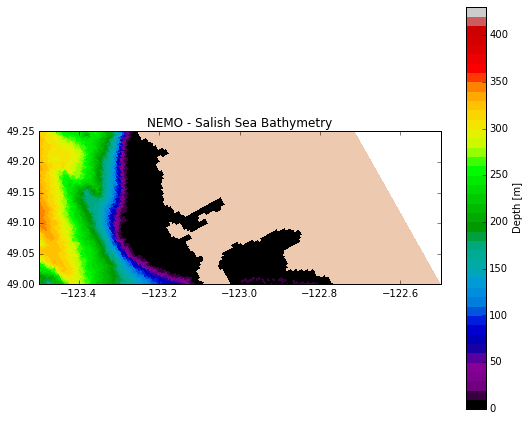

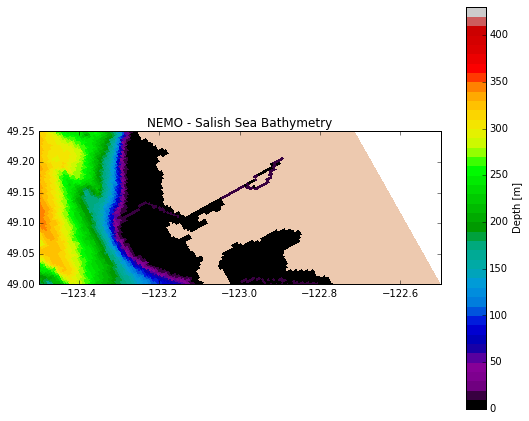

In [15]:
#plt.subplot(1, 2, 1)
figg = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49., 49.25), 
colour_map='spectral', bins=50)
#plt.subplot(1, 2, 2)
figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49., 49.25), 
colour_map='spectral', bins=50)

<matplotlib.colorbar.Colorbar instance at 0x7f7ebcee6248>

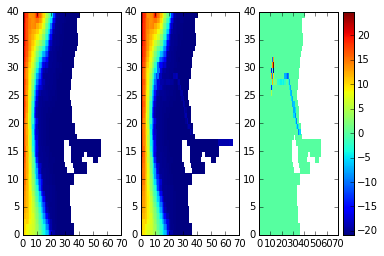

In [14]:
plt.subplot(1, 3, 1)
plt.pcolormesh(bathyy[400:440, 280:345])
plt.subplot(1, 3, 2)
plt.pcolormesh(bathyy_3[400:440, 280:345])
plt.subplot(1, 3, 3)
plt.pcolormesh(bathyy[400:440, 280:345] - bathyy_3[400:440, 280:345], 
               cmap=plt.cm.jet)
plt.colorbar()

In [9]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')

In [10]:
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]
lon = bathy.variables['nav_lon']
lat = bathy.variables['nav_lat']

# Create bathy_meter_SalishSea4.nc only added with mean sea level

In [14]:
import numpy.ma as ma

In [15]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc \
bathy_meter_SalishSea4.nc
bathy_4 = nc.Dataset('bathy_meter_SalishSea4.nc','r+')
bathyy_4 = bathy_4.variables['Bathymetry']

In [16]:
bathyy_4[414,334]

4.0

In [17]:
#bathyy_4 = np.ma.zeros((898,398), dtype = float)
bathyy_4[:] = bathyy_4[:] + 3.095
#bathyy_5 = ma.masked_where(, bathyy_4)

In [18]:
bathyy_4 = bathy_4.variables['Bathymetry']

In [19]:
bathyy_4[414,334]

7.125

## Show center grid and corner grid

-123.31577301
49.1077346802
-18.9463806152
6.46408081055
2.405


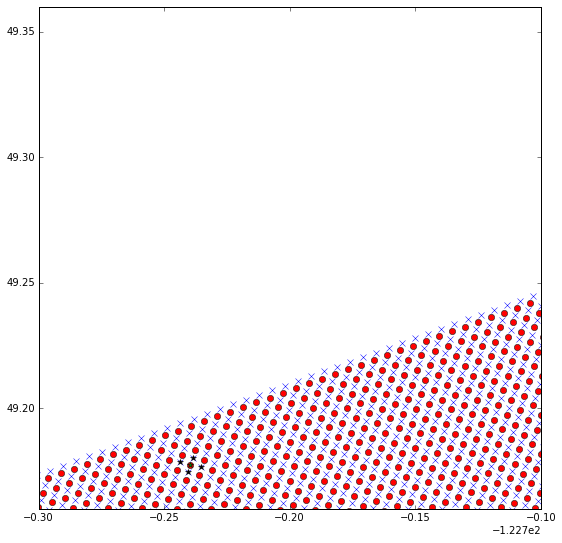

In [11]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
#plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[416,354], lat_f[416,354], '*k')
plt.plot(lon_f[416,355], lat_f[416,355], '*k')
plt.plot(lon_f[415,354], lat_f[415,354], '*k')
plt.plot(lon_f[415,355], lat_f[415,355], '*k')
plt.plot(lon[416,355], lat[416,355], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[419,313], lat[419,313], '*g')
plt.xlim((-123., -122.8))
plt.ylim(( 49.16, 49.36))
#print (sqrt((lon_f[416, 341] - lon_f[416, 340])^2 + (lat_f[416, 341] - lat_f[416, 340])^2)
print (lon[429, 291])
print (lat[429, 291])
print (lon[429, 291] + 123) * 60
print (lat[429, 291] -49) *60
print (10.26 - 10) *9.25

-122.938664796
49.1803698307
-56.1179688307
10.5869464138
2.405


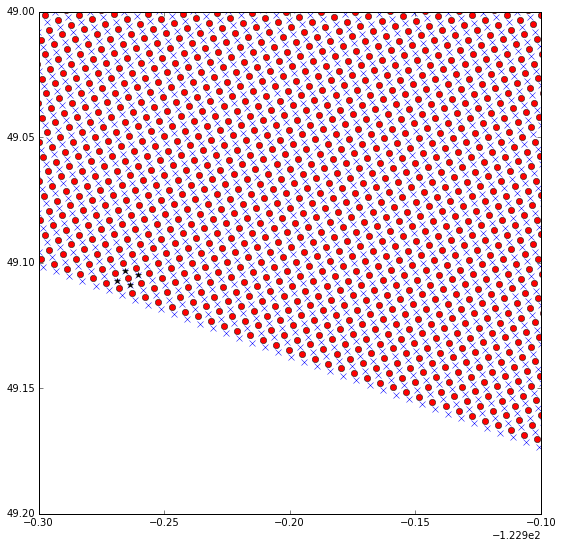

In [12]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
#plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[417,312], lat_f[417,312], '*k')
plt.plot(lon_f[418,312], lat_f[418,312], '*k')
plt.plot(lon_f[417,313], lat_f[417,313], '*k')
plt.plot(lon_f[418,313], lat_f[418,313], '*k')
#plt.plot(lon[416,341], lat[416,341], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[419,313], lat[419,313], '*g')
plt.xlim((-123.2, -123.))
plt.ylim(( 49.2, 49.))
#print (sqrt((lon_f[416, 341] - lon_f[416, 340])^2 + (lat_f[416, 341] - lat_f[416, 340])^2)
print (lon_f[416, 355])
print (lat_f[416, 355])
print (lon_f[415, 355] + 122) * 60
print (lat_f[415, 355] -49) *60
print (10.26 - 10) *9.25